# The Neural Basis of Loss Aversion in Decision-Making Under Risk
## Data Exploration
There are total sixteen subjects. In each subject folder, there are four sub-folders: anatomy, behav, BOLD, and model. The folder anatomy contains five nii files: highres001_brain_mask.nii.gz, highres001_brain.nii.gz, highres001.nii.gz, inplane_brain.nii.gz, inplane.nii.gz. The behav folder contains three folders for each run, which contains a text file called behavdata.txt in each run. The hehavdata.txt consists of eight columns: onset, gain, loss, PTval, respnum, respcat, and RT. The BOLD folder also includes three folders for three runs respectively. Each folder for one run includes bold.nii.gz and a QA folder which includes Quality Analysis for this run done by the authors of the paper. The model folder again contains three runs and four cond00x.txt files for each run.

In [2]:
import numpy as np
import numpy.linalg as npl
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

### Exploring subject 001

In [3]:
#Please change the following address to your local address where these files locate when you run these codes
anatomy_loc = "/Users/annaliu/stat159/ds005/sub001/anatomy"
behav_loc = "/Users/annaliu/stat159/ds005/sub001/behav/task001_run001"
bold_loc = "/Users/annaliu/stat159/ds005/sub001/BOLD/task001_run001"
model_loc = "/Users/annaliu/stat159/ds005/sub001/model/model001/onsets/task001_run001"
utils_loc = "/Users/annaliu/stat159/project-delta-1/code/utils"

#### Plotting anatomy plots

In [4]:
os.chdir(utils_loc)
from utils import plot_nii
os.chdir(anatomy_loc)

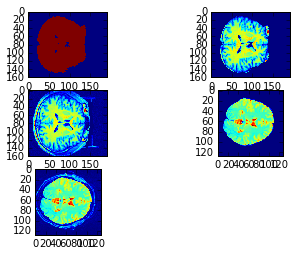

In [5]:
plt.subplot(321)
plot_nii("highres001_brain_mask.nii.gz")
plt.subplot(322)
plot_nii("highres001_brain.nii.gz")
plt.subplot(323)
plot_nii("highres001.nii.gz")
plt.subplot(324)
plot_nii("inplane_brain.nii.gz")
plt.subplot(325)
plot_nii("inplane.nii.gz")

#### Exploring hehavior data

In [6]:
os.chdir(behav_loc)
behav_data = pd.read_table("behavdata.txt")
behav_data.head(10)

,onset,gain,loss,PTval,respnum,respcat,RT
0,0,20,15,5.15,0,-1,0.000
1,4,18,12,6.12,2,1,1.793
2,8,10,15,-4.85,3,0,1.637
3,18,34,16,18.16,1,1,1.316
4,24,18,5,13.05,1,1,1.670
5,28,26,13,13.13,2,1,1.232
6,38,32,17,15.17,2,1,1.502
7,42,16,5,11.05,2,1,1.925
8,46,22,7,15.07,1,1,1.061
9,52,36,8,28.08,1,1,1.079


#### Exploring cond.txt file in model folder

In [7]:
os.chdir(model_loc)
cond_data = pd.read_table("cond001.txt",header=-1)
cond_data.head(10)

,0,1,2
0,0,3,1
1,4,3,1
2,8,3,1
3,18,3,1
4,24,3,1
5,28,3,1
6,38,3,1
7,42,3,1
8,46,3,1
9,52,3,1


#### Exploring BOLD

In [8]:
os.chdir(utils_loc)
from utils import plot_bold_nii
os.chdir(bold_loc)

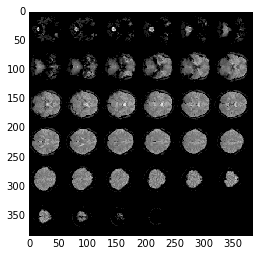

In [9]:
plot_bold_nii("bold.nii.gz",0)

#### Exploring Time Course

In [12]:
os.chdir(model_loc)
task = np.loadtxt('cond001.txt')
task[:10,]

array([[  0.,   3.,   1.],
       [  4.,   3.,   1.],
       [  8.,   3.,   1.],
       [ 18.,   3.,   1.],
       [ 24.,   3.,   1.],
       [ 28.,   3.,   1.],
       [ 38.,   3.,   1.],
       [ 42.,   3.,   1.],
       [ 46.,   3.,   1.],
       [ 52.,   3.,   1.]])

In [14]:
TR=2
ons_durs = task[:, :2] / TR
ons_durs[:10,]

array([[  0. ,   1.5],
       [  2. ,   1.5],
       [  4. ,   1.5],
       [  9. ,   1.5],
       [ 12. ,   1.5],
       [ 14. ,   1.5],
       [ 19. ,   1.5],
       [ 21. ,   1.5],
       [ 23. ,   1.5],
       [ 26. ,   1.5]])

In [16]:
os.chdir(bold_loc)
img = nib.load('bold.nii.gz')
time_course = np.zeros(img.shape[-1])
for i in range(len(task)):
    time_course[ons_durs[i,0]: ons_durs[i,0]+ ons_durs[i,1]] = task[i,2]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.])

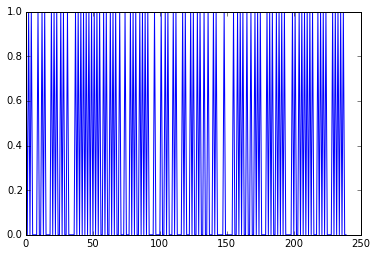

In [17]:
plt.plot(time_course)

#### Comparing task to rest

In [23]:
is_task_tr = (time_course == 1)
is_rest_tr = (time_course == 0)
data = img.get_data()
data.shape

(64, 64, 34, 240)

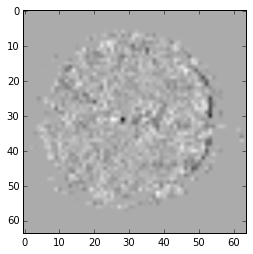

In [24]:
on_volumes = data[..., is_task_tr]
off_volumes = data[..., is_rest_tr]
on_mean = on_volumes.mean(axis=-1)
off_mean = off_volumes.mean(axis=-1)
difference = on_mean - off_mean
plt.imshow(difference[:, :, 14], cmap='gray')

It seems that there is no artefact. If there exists artefact, we should take the following steps to fix.

#### Fixing the Artefact

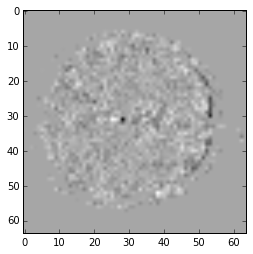

In [21]:
off_volumes_fixed = off_volumes[..., 1:]
off_mean_fixed = off_volumes_fixed.mean(axis=-1)
difference_fixed = on_mean - off_mean_fixed
plt.imshow(difference_fixed[:, :, 14], cmap='gray')

#### Looking into a single voxel time course

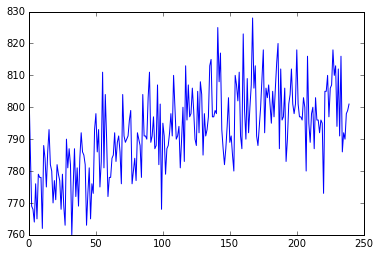

In [39]:
voxel_time_course = data[32, 32, 17]
plt.plot(voxel_time_course)

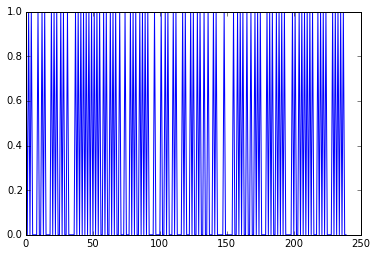

In [40]:
os.chdir(utils_loc)
from stimuli import events2neural
TR = 2
n_trs = data.shape[-1]
os.chdir(model_loc)
neural = events2neural('cond001.txt', TR, n_trs)
plt.plot(neural)

We plot the neural time course again using the function given in class.

In [44]:
neural = neural[1:]
np.corrcoef(neural, voxel_time_course[1:])

array([[ 1.        ,  0.05061914],
       [ 0.05061914,  1.        ]])

We explore the correlation between this specific voxel and the neural time course. It seems they do not have relationship. We can identify the activated voxels by examing all voxels.

#### Exploring correlation for each voxel

In [46]:
time_course = events2neural('cond001.txt', TR, n_trs)
data = img.get_data()
data = data[..., 4:]
time_course = time_course[4:]
n_voxels = np.prod(data.shape[:-1])
data_2d = np.reshape(data, (n_voxels, data.shape[-1]))
correlations_1d = np.zeros((n_voxels,))
for i in range(n_voxels):
    correlations_1d[i] = np.corrcoef(time_course, data_2d[i, :])[0, 1]
correlations = np.reshape(correlations_1d, data.shape[:-1])

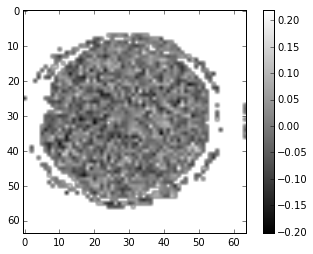

In [48]:
plt.imshow(correlations[:, :, 17], cmap='gray')
plt.colorbar()